# Exercise 2.4 Evaluating Hyperparameters - Convolutional Neural Network (CNN)

### Contents:

#### 01. Importing Libraries and Data
#### 02. Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data
#### 03. Hyperparameter Tuning with Bayesian Optimization
#### 04. Building the CNN Model with Optimized Hyperparameters

## 01. Importing Libraries and Data

In [53]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Machine Learning\Achievement 2\Achievment Project'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_prediction_cleaned.csv'))

In [6]:
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'pleasant_weather_cleaned.csv'))

In [7]:
# Check data

df.head(1)

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [8]:
pleasant.head(1)

,Unnamed: 0,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check shape

df.shape

(22950, 138)

In [10]:
# Check shape

pleasant.shape

(22950, 17)

## 02. Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data

**Data Cleaning and Wrangling**

In [11]:
# Remove unnamed column
df_1 = df.drop(columns=['Unnamed: 0'])

In [12]:
# Check output
df_1.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [13]:
# Check shape
df_1.shape

(22950, 137)

In [14]:
# Drop unnamed column from pleasant dataset
df_pleasant = pleasant.drop(columns=['Unnamed: 0'])

In [15]:
# Check output
df_pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop 'DATE' and 'MONTH' columns from weather dataset
df_2 = df_1.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2.shape

(22950, 135)

In [17]:
df_2.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [18]:
# Drop 'DATE' column from pleasant dataset
df_pleasant = df_pleasant.drop(columns=['DATE'])

# Check shape
df_pleasant.shape

(22950, 15)

**Reshaping the Data**

In [19]:
# Create matrices
X = df_2
y = df_pleasant

# Check shapes
print(X.shape)
print(y.shape)

(22950, 135)
(22950, 15)


In [20]:
# Create matrices
X = X.to_numpy()
print(X.shape)

(22950, 135)


In [21]:
# Reshape X to (22950, 15, 9)

X = X.reshape(-1, 15, 9)
print(X.shape)

(22950, 15, 9)


In [22]:
y = np.array(y)

In [23]:
# Reshape y to (22950,)
y = np.argmax(y, axis=1)
print("y shape after argmax:", y.shape)

y shape after argmax: (22950,)


In [24]:
# Check unique values in yto ensure it's correct
print("Unique values in y:", np.unique(y))

Unique values in y: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [25]:
# Check shape
y.shape

(22950,)

**Splitting the Data**

In [26]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

In [27]:
type_of_target(y)

'multiclass'

In [28]:
## 03.

In [29]:
# Determine the number of time steps for the input data
timesteps = X_train.shape[1]

# Determine the dimensionality of the input data
input_dim = X_train.shape[2]

# Specify the number of classes for the target variable
n_classes = 15  

# Create a scorer for accuracy
score_acc = make_scorer(accuracy_score)

In [30]:
# Create function
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'SGD']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer_name = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def cnn_model():
        model = Sequential()
        model.add(Input(shape=(timesteps, input_dim)))
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation))
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=127))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))  # sigmoid softmax
        
        # Create a new optimizer instance for each iteration
        if optimizer_name == 'Adam':
            optimizer_instance = Adam(learning_rate=learning_rate)
        elif optimizer_name == 'SGD':
            optimizer_instance = SGD(learning_rate=learning_rate)
        elif optimizer_name == 'RMSprop':
            optimizer_instance = RMSprop(learning_rate=learning_rate)
        elif optimizer_name == 'Adadelta':
            optimizer_instance = Adadelta(learning_rate=learning_rate)
        elif optimizer_name == 'Adagrad':
            optimizer_instance = Adagrad(learning_rate=learning_rate)
        elif optimizer_name == 'Adamax':
            optimizer_instance = Adamax(learning_rate=learning_rate)
        elif optimizer_name == 'Nadam':
            optimizer_instance = Nadam(learning_rate=learning_rate)
        elif optimizer_name == 'Ftrl':
            optimizer_instance = Ftrl(learning_rate=learning_rate)
        
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
        return model

    # K-fold cross-validation
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=20)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=127)
    results = []
    for train, test in kfold.split(X, y):
        model = cnn_model()
        model.fit(X[train], y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])
        scores = model.evaluate(X[test], y[test], verbose=1)
        results.append(scores[1])  # Assuming accuracy is the second metric
    return np.mean(results)


In [31]:
# Start timing the Bayesian Optimization process
start = time.time()

# Define the hyperparameter space for Bayesian Optimization
params = {
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation': (0, 9),  # 9
    'optimizer': (0, 7),  # 7
    'learning_rate': (0.001, 1),
    'batch_size': (200, 1000), #(10, 50), #
    'epochs': (20, 100),
    'layers1': (1, 3),
    'layers2': (1, 3),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0.3, 0.5)
}

# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=127)
nn_opt.maximize(init_points=15, n_iter=4)  # 25
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 37: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0012 - loss: 70.8729  
Epoch 22: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6552 - loss: 54.9320
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 80.5827
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 47.9571
Epoch 20: early stopping
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 86.5364
| 1         | 0.5149    | 4.714     | 232.0     | 0.186     | 0.4546    | 64.17     | 1.173     | 1.883     | 2.431     | 0.6709    | 52.56     | 0.9062 

In [32]:
best_params = nn_opt.max['params']
best_score = nn_opt.max['target']

print(f"Best Parameters: {best_params}")
print(f"Highest Accuracy: {best_score}")

Best Parameters: {'activation': 3.8000000664394693, 'batch_size': 283.3322390154355, 'dropout': 0.7074595585192304, 'dropout_rate': 0.4555434720662375, 'epochs': 34.65960061877632, 'kernel': 1.9330370404101562, 'layers1': 2.5563423061372124, 'layers2': 2.4609201417995576, 'learning_rate': 0.05663626674115159, 'neurons': 78.55253178394501, 'normalization': 0.48455285581376706, 'optimizer': 0.4788637472286189}
Highest Accuracy: 0.7844444394111634


In [33]:
# Retrieve the best parameters from the optimization result
optimum = nn_opt.max['params']

# Assign the best parameters to their respective variables
learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU', 'relu']
activation = activationL[round(optimum['activation'])]

# Convert the hyperparameters to their integer form where necessary
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimum['kernel'] = round(optimum['kernel'])

optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD = {
    'SGD': SGD(learning_rate=learning_rate),
    'Adam': Adam(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}

# Retrieve the optimizer name
optimizer_name = optimizerL[round(optimum['optimizer'])]

# Print the optimum parameters in a readable format
print(f"Best Parameters: ")
print(f"Activation: {activation}")
print(f"Batch Size: {optimum['batch_size']}")
print(f"Dropout Rate: {optimum['dropout_rate']:.4f}")
print(f"Epochs: {optimum['epochs']}")
print(f"Kernel Size: {optimum['kernel']}")
print(f"Layers1: {optimum['layers1']}")
print(f"Layers2: {optimum['layers2']}")
print(f"Learning Rate: {optimum['learning_rate']:.4f}")
print(f"Neurons: {optimum['neurons']}")
print(f"Normalization: {optimum['normalization']:.4f}")
print(f"Optimizer: {optimizer_name}")

Best Parameters: 
Activation: tanh
Batch Size: 283
Dropout Rate: 0.4555
Epochs: 35
Kernel Size: 2
Layers1: 3
Layers2: 2
Learning Rate: 0.0566
Neurons: 79
Normalization: 0.4846
Optimizer: SGD


## 04. Building the CNN Model with Optimized Hyperparameters

In [34]:
# Best parameters from optimization
best_params = {
    'neurons': 13,
    'kernel': 3,
    'activation': 'softsign',
    'optimizer': 'Adam',
    'learning_rate': 0.0615,
    'batch_size': 858,
    'epochs':60,
    'layers1': 2,
    'layers2': 2,
    'normalization': 0.4579,
    'dropout': 0.40228837505867143,
    'dropout_rate':  0.3935
}

# Initialize optimizer with learning rate
optimizers = {
    'Adam': Adam(learning_rate=best_params['learning_rate']),
    'SGD': SGD(learning_rate=best_params['learning_rate']),
    'RMSprop': RMSprop(learning_rate=best_params['learning_rate']),
    'Adadelta': Adadelta(learning_rate=best_params['learning_rate']),
    'Adagrad': Adagrad(learning_rate=best_params['learning_rate']),
    'Adamax': Adamax(learning_rate=best_params['learning_rate']),
    'Nadam': Nadam(learning_rate=best_params['learning_rate']),
    'Ftrl': Ftrl(learning_rate=best_params['learning_rate'])
}

optimizer = optimizers[best_params['optimizer']]

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
#n_classes = len(y_train[0])

model = Sequential()
model.add(Conv1D(best_params['neurons'], kernel_size=best_params['kernel'], activation=best_params['activation'], input_shape=(15,9)))

if best_params['normalization'] > 0.5:
    model.add(BatchNormalization())

for _ in range(best_params['layers1']):
    model.add(Dense(best_params['neurons'], activation=best_params['activation']))

if best_params['dropout'] > 0.5:
    model.add(Dropout(best_params['dropout_rate'], seed=123))

for _ in range(best_params['layers2']):
    model.add(Dense(best_params['neurons'], activation=best_params['activation']))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) # sigmoid, tanh, softmax

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with the optimized parameters
model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=2)


Epoch 1/60


C:\Users\jenci\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 - 3s - 122ms/step - accuracy: 0.5956 - loss: 1.2957
Epoch 2/60
21/21 - 0s - 6ms/step - accuracy: 0.6373 - loss: 1.0307
Epoch 3/60
21/21 - 0s - 6ms/step - accuracy: 0.6348 - loss: 1.0022
Epoch 4/60
21/21 - 0s - 6ms/step - accuracy: 0.6311 - loss: 0.9831
Epoch 5/60
21/21 - 0s - 6ms/step - accuracy: 0.6667 - loss: 0.9282
Epoch 6/60
21/21 - 0s - 6ms/step - accuracy: 0.7068 - loss: 0.8750
Epoch 7/60
21/21 - 0s - 6ms/step - accuracy: 0.6786 - loss: 0.8949
Epoch 8/60
21/21 - 0s - 6ms/step - accuracy: 0.6880 - loss: 0.8512
Epoch 9/60
21/21 - 0s - 6ms/step - accuracy: 0.6989 - loss: 0.8233
Epoch 10/60
21/21 - 0s - 6ms/step - accuracy: 0.7144 - loss: 0.7644
Epoch 11/60
21/21 - 0s - 6ms/step - accuracy: 0.7391 - loss: 0.7209
Epoch 12/60
21/21 - 0s - 6ms/step - accuracy: 0.7369 - loss: 0.7393
Epoch 13/60
21/21 - 0s - 6ms/step - accuracy: 0.7568 - loss: 0.6711
Epoch 14/60
21/21 - 0s - 6ms/step - accuracy: 0.7207 - loss: 0.8123
Epoch 15/60
21/21 - 0s - 6ms/step - accuracy: 0.7409 - loss: 0.727

In [35]:
model.summary()

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_95 (Conv1D)              │ (None, 13, 13)         │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_475 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_476 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_477 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_478 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_95 (MaxPooling1D) │ (None, 6, 13)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_95 (Flatten)            │ (None, 78)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_479 (Dense)               │ (None, 15)             │         1,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,833 (26.70 KB)

 Trainable params: 2,277 (8.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,556 (17.80 KB)

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Assuming X_train and y_train are your input data and labels
# One-hot encode y_train
y_train_one_hot = to_categorical(y_train, num_classes=15)

In [38]:
# Check shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (17212, 15, 9)
y_train_one_hot shape: (17212, 15)


In [39]:
model.fit(X_train, y_train_one_hot, batch_size=744, epochs=97, verbose=2)

Epoch 1/97
24/24 - 3s - 120ms/step - accuracy: 0.8527 - loss: 0.4122
Epoch 2/97
24/24 - 0s - 6ms/step - accuracy: 0.8608 - loss: 0.3910
Epoch 3/97
24/24 - 0s - 6ms/step - accuracy: 0.8641 - loss: 0.3833
Epoch 4/97
24/24 - 0s - 6ms/step - accuracy: 0.8659 - loss: 0.3785
Epoch 5/97
24/24 - 0s - 6ms/step - accuracy: 0.8664 - loss: 0.3750
Epoch 6/97
24/24 - 0s - 6ms/step - accuracy: 0.8691 - loss: 0.3721
Epoch 7/97
24/24 - 0s - 6ms/step - accuracy: 0.8706 - loss: 0.3694
Epoch 8/97
24/24 - 0s - 6ms/step - accuracy: 0.8693 - loss: 0.3669
Epoch 9/97
24/24 - 0s - 6ms/step - accuracy: 0.8704 - loss: 0.3652
Epoch 10/97
24/24 - 0s - 6ms/step - accuracy: 0.8721 - loss: 0.3626
Epoch 11/97
24/24 - 0s - 6ms/step - accuracy: 0.8729 - loss: 0.3620
Epoch 12/97
24/24 - 0s - 6ms/step - accuracy: 0.8729 - loss: 0.3600
Epoch 13/97
24/24 - 0s - 6ms/step - accuracy: 0.8729 - loss: 0.3597
Epoch 14/97
24/24 - 0s - 5ms/step - accuracy: 0.8736 - loss: 0.3572
Epoch 15/97
24/24 - 0s - 6ms/step - accuracy: 0.8741 - 

In [40]:
# Change this to Weather true/false
stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

In [41]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [42]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])



In [43]:
# Before making predictions, convert y_test to one-hot format
y_test_one_hot = to_categorical(y_test, num_classes=15)

In [44]:
y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
# Convert y_test_one_hot back to class labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [48]:
# Manually calculate accuracy
y_pred_labels = np.argmax(y_pred, axis=1)
correct_predictions = np.sum(y_test_labels == y_pred_labels)
total_samples = len(y_test_labels)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.96%


In [49]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [50]:
# Convert y_test_one_hot back to class labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [51]:
cm = confusion_matrix(y_test, y_pred, stations)
print(cm)

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  KASSEL  \
True                                                                          
BASEL        3518       133         9       2           2         8       0   
BELGRADE      170       921         3       0           0         1       1   
BUDAPEST       38        54       115      11           1         0       0   
DEBILT         22         7        12      34           1         2       0   
DUSSELDORF      3         1         5       2           9        11       0   
HEATHROW        4         6         6       4           0        63       0   
KASSEL          3         4         3       1           0         1       0   
LJUBLJANA      10         1         1       1           1         1       2   
MAASTRICHT      1         0         0       0           1         1       0   
MADRID          7        26         8       0           0        17       0   
MUNCHENB        8         1         2       0       

In [57]:
# Define function to plot confusion matrices
def plot_confusion_matrices(confusion_matrices, class_labels):
    fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 stations
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, (conf_matrix, label) in enumerate(zip(confusion_matrices, class_labels)):
        if conf_matrix.sum() > 0:  # Plot only if the confusion matrix contains data
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix for {label}')
            axes[i].set_xlabel('Predicted Label')
            axes[i].set_ylabel('True Label')
        else:
            axes[i].axis('off')  # Hide empty subplots
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])

    plt.tight_layout()
    plt.show()


NameError: name 'y_true_labels' is not defined

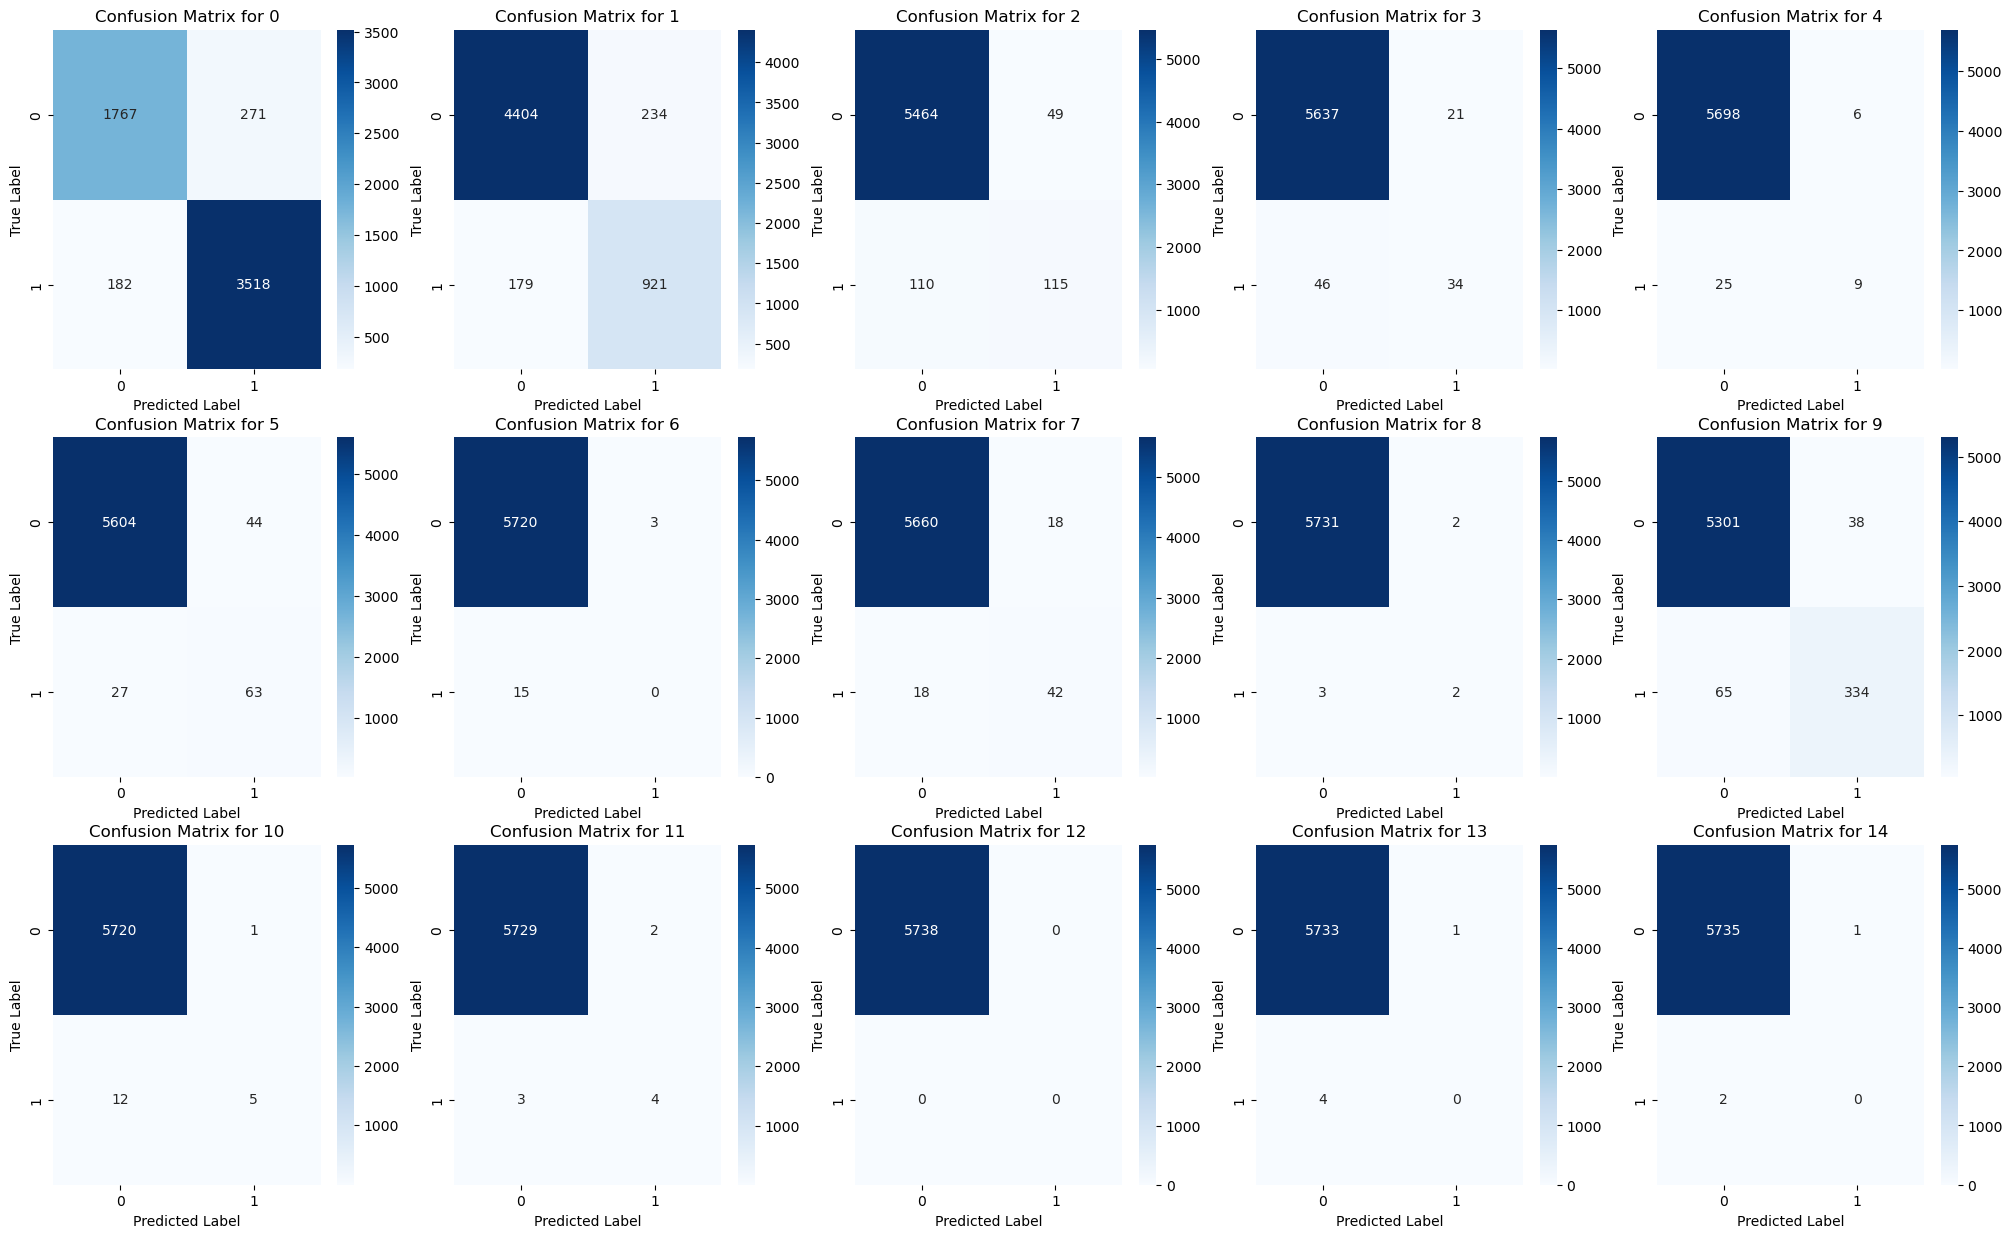

In [59]:
# Generate individual confusion matrices for each station
confusion_matrices = []
for station in stations:
    cm_station = sklearn_confusion_matrix(
        y_test_labels == station,
        y_pred_labels == station,
        labels=[False, True]
    )
    confusion_matrices.append(cm_station)

# Plot the confusion matrices
plot_confusion_matrices(confusion_matrices, stations)